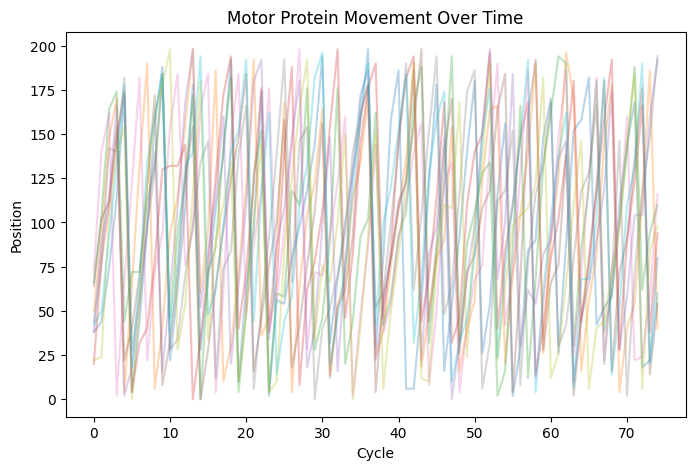

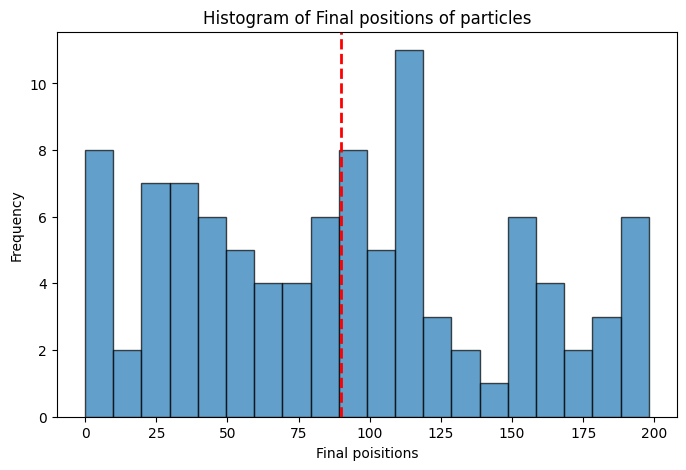

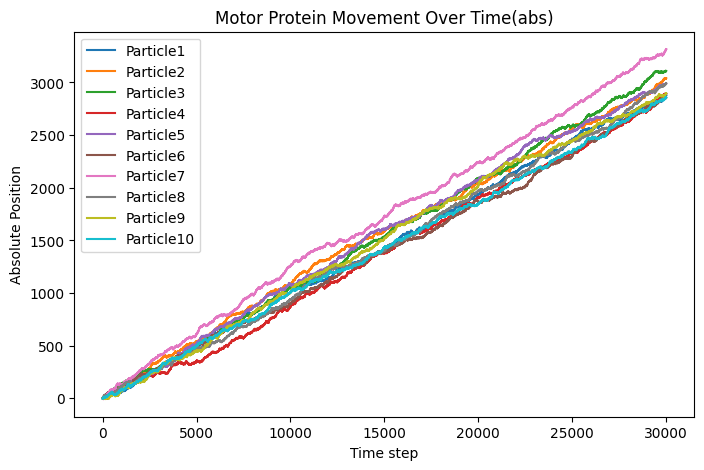

p_right: 0.55, p_left: 0.44999999999999996


In [35]:
import numpy as np
import matplotlib.pyplot as plt

#Set parameters
h = 1 #step length

#Grid and time setup
Tp = 200 #time period before switching potential
Nx = 100 #steps per potential periods
total_positions = 2 * Nx #Full x-axis range (200 positions)
num_cycles = 75 #number of cycles
one_cycle = 2 * Tp #time for one cycle
Np = 100 #number of particles
Total_steps = num_cycles * one_cycle #total time steps = 30000

#Ratchet effect parameters
alpha = 0.1 #Bias in movement 
beta_k = 1000 #strength of potential

#probability of moving right or left
p_right = 0.55 #probability of moving right
p_left = 1-p_right #probablity of moving left

#Initial position of particles
X = np.zeros(Np, dtype=int) #this creates a size 3 array where all particles are at X= 0
absolute_X = np.zeros((Total_steps,Np), dtype=int) #Absolute position
positions_over_time = np.zeros((num_cycles, Np), dtype=int) #array to store positions of particles over time

#run simulation 
step = 0
temp_X = np.zeros((Np), dtype=int)
for cycle in range(num_cycles): #loops over the number of cycles=75
    for i in range(one_cycle): #loops over the time period of one cycle = 400
        random_values = np.random.rand(Np) #generates NP random values
        move = np.where(random_values < p_right, 1, -1) #moves particles roght or left based on the condition
        X = (X+move)% total_positions #apply periodic boundary conditions
        temp_X+=move
        absolute_X[step,:] = temp_X #track absolute mpovement without boundary
        step+=1
    positions_over_time[cycle, :] =  X #stores positions of particles over time
        

plt.figure(figsize=(8,5))
for i in range(min(Np, 10)):
    plt.plot(np.arange(num_cycles), positions_over_time[:, i], alpha=0.3)
plt.xlabel("Cycle")
plt.ylabel("Position")
plt.title("Motor Protein Movement Over Time")
plt.show()

#plot histogram of final positions
final_positions =  X
plt.figure(figsize = (8,5))
plt.hist(final_positions, bins=20, edgecolor='black', alpha=0.7)
mean_position = np.mean(final_positions)
plt.axvline(mean_position, color='red', linestyle = 'dashed', linewidth=2, label= f'Mean: {mean_position:.2f}')
plt.xlabel("Final poisitions")
plt.ylabel("Frequency")
plt.title("Histogram of Final positions of particles")
plt.show()


plt.figure(figsize = (8,5))
for i in range(min(Np, 10)):
    plt.plot(np.arange(Total_steps), absolute_X[:, i], label=f"Particle{i+1}")
plt.xlabel("Time step")
plt.ylabel("Absolute Position")
plt.title("Motor Protein Movement Over Time(abs)")
plt.legend()
plt.show()
print(f"p_right: {p_right}, p_left: {p_left}")